In [1]:
import pandas as pd
import numpy as np
import pyvista as pv
import scipy.io
import sys

import warnings
warnings.filterwarnings("ignore")

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')
from lib_data import DATA_IO

import utils_io, utils_plotting_cortex

In [2]:
# load ECoG channel MNI coordinates
MNI_ECoG_channels = pd.read_pickle(DATA_IO.path_coordinates + "MNI_ECoG_channels.pkl")

# load dataframe of ECoG tapping events
ECOG_PSD          = utils_io.load_ECoG_event_PSD(event_category="tapping", event_laterality="controlateral")
feature_set       = ['pre_event_theta_mean', 'pre_event_beta_low_mean', 'pre_event_beta_high_mean', 'pre_event_gamma_mean',
                     'event_theta_mean', 'event_beta_low_mean', 'event_beta_high_mean', 'event_gamma_mean',
                     'post_event_theta_mean', 'post_event_beta_low_mean', 'post_event_beta_high_mean', 'post_event_gamma_mean']
ECOG_dynamics     = utils_plotting_cortex.measure_mean_psd_activity_for_ECoG_channel(ECOG_PSD, MNI_ECoG_channels, feature_set)
cortex_mesh       = utils_io.load_cortical_atlas_meshes()

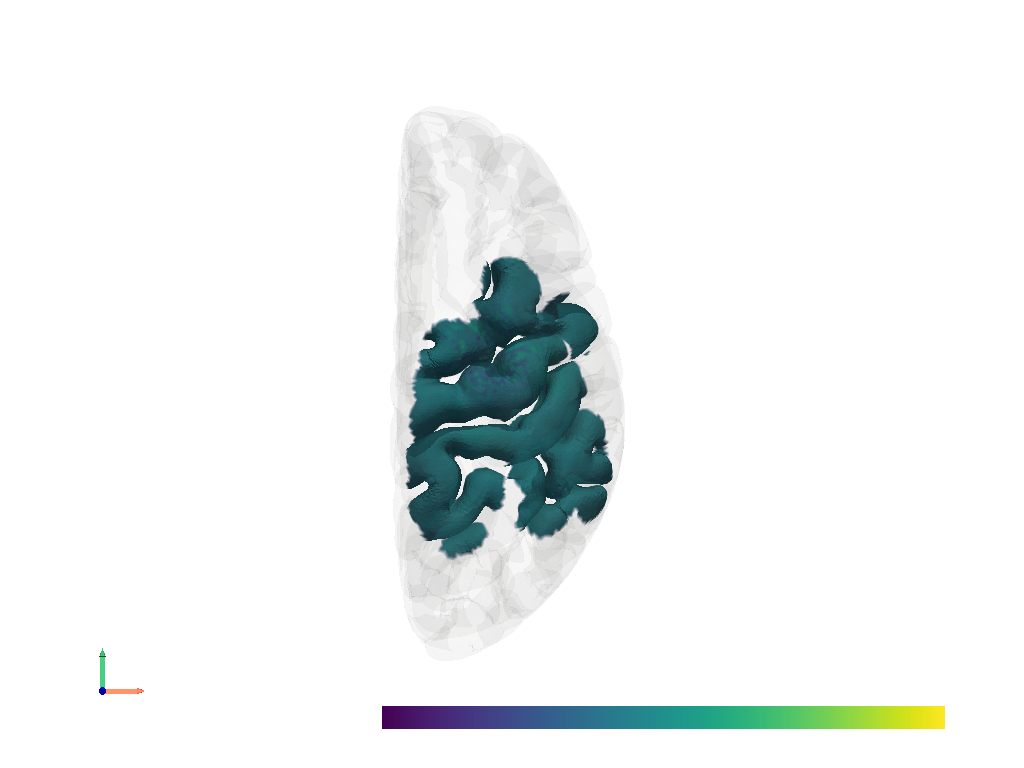

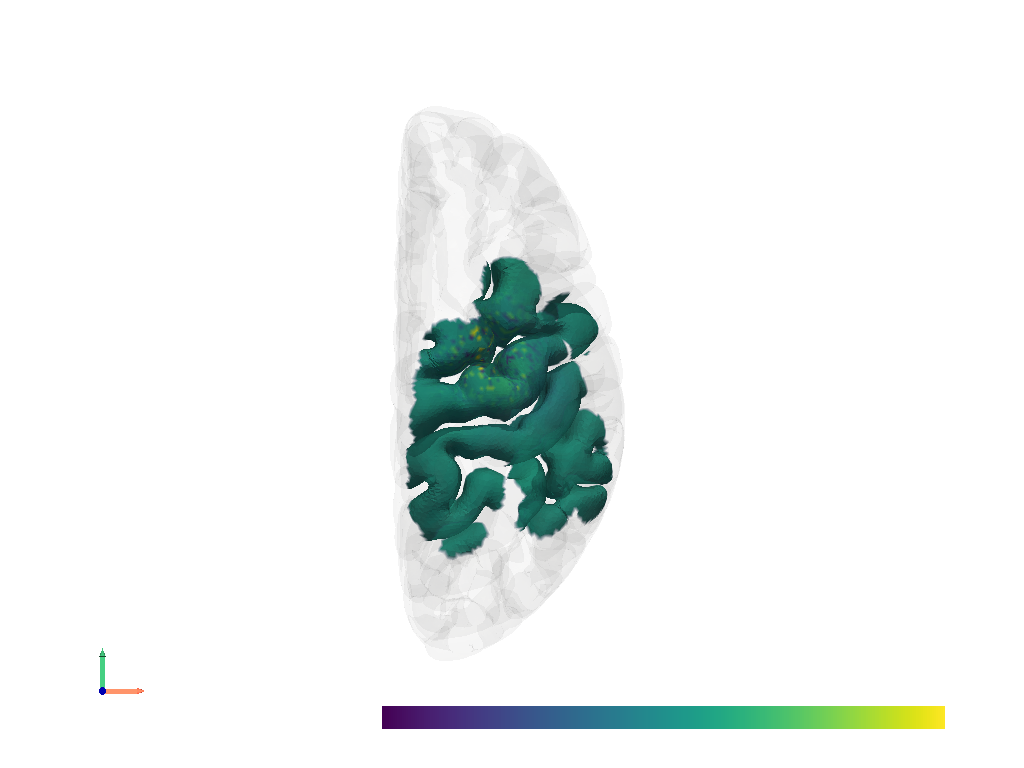

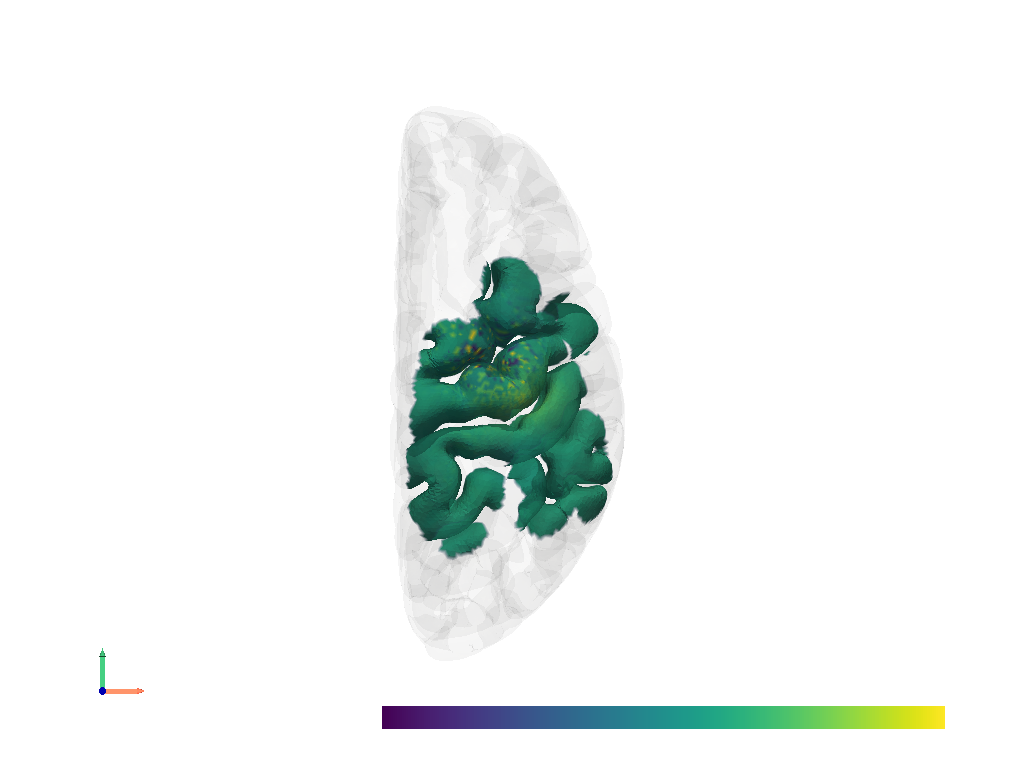

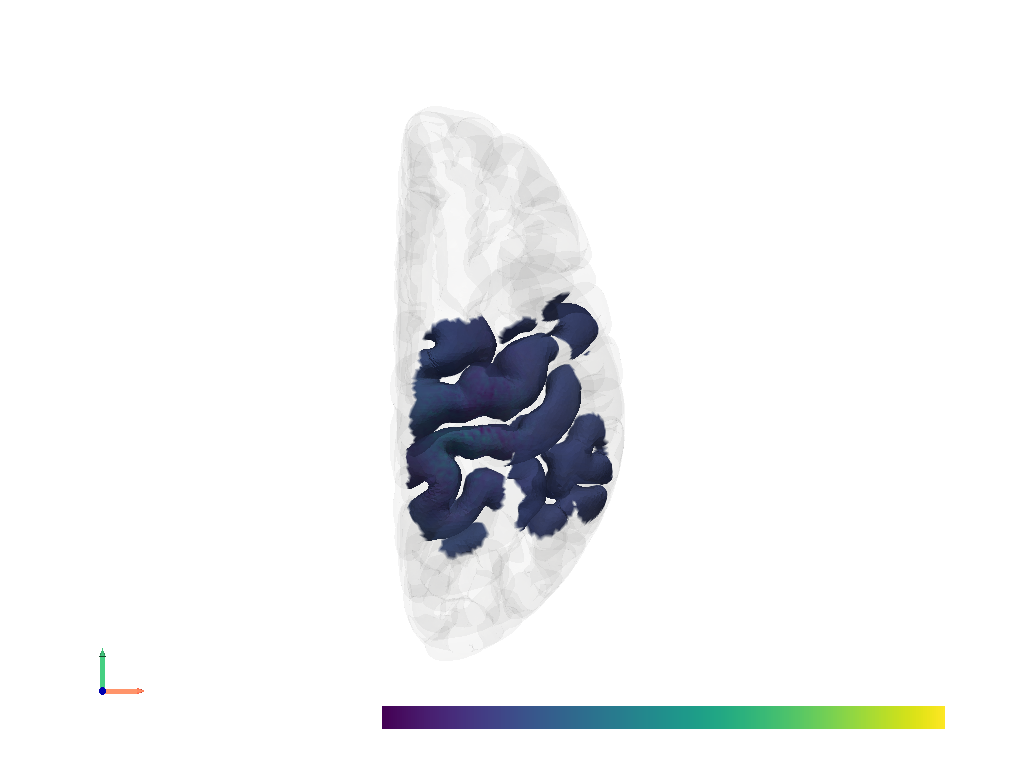

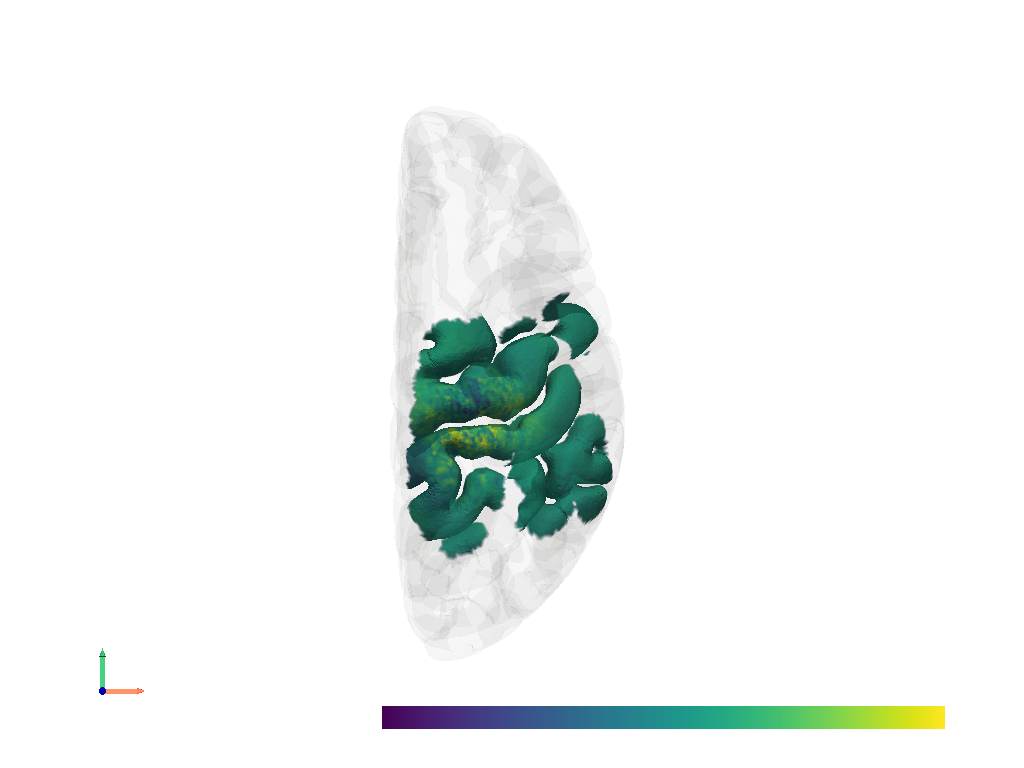

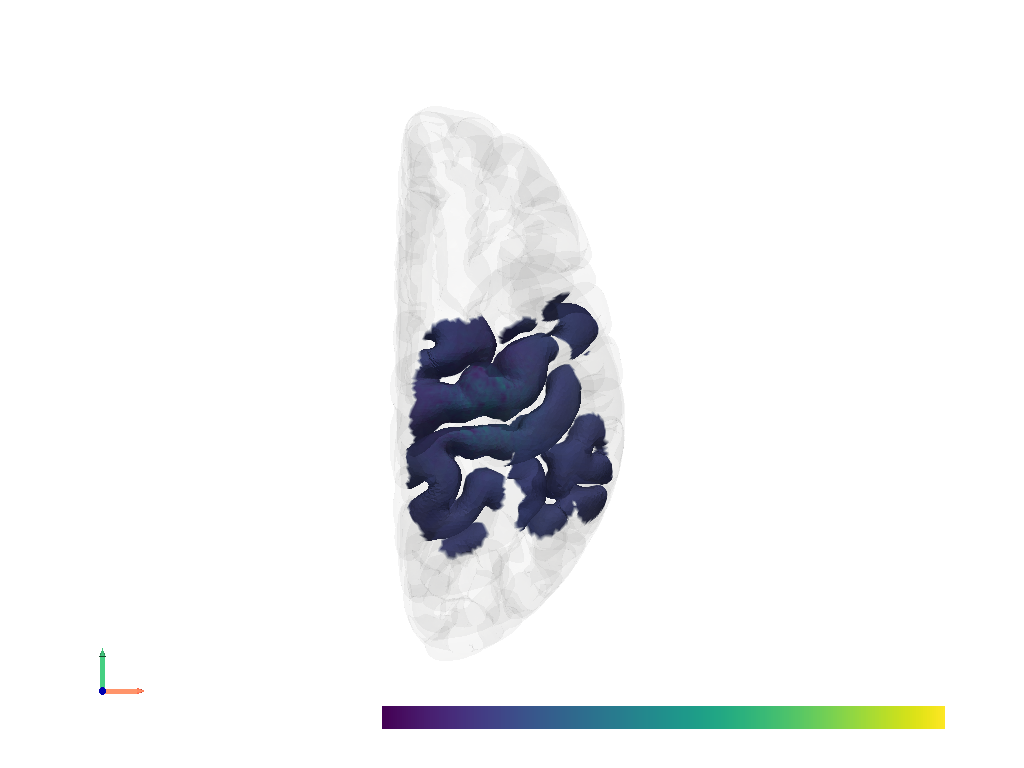

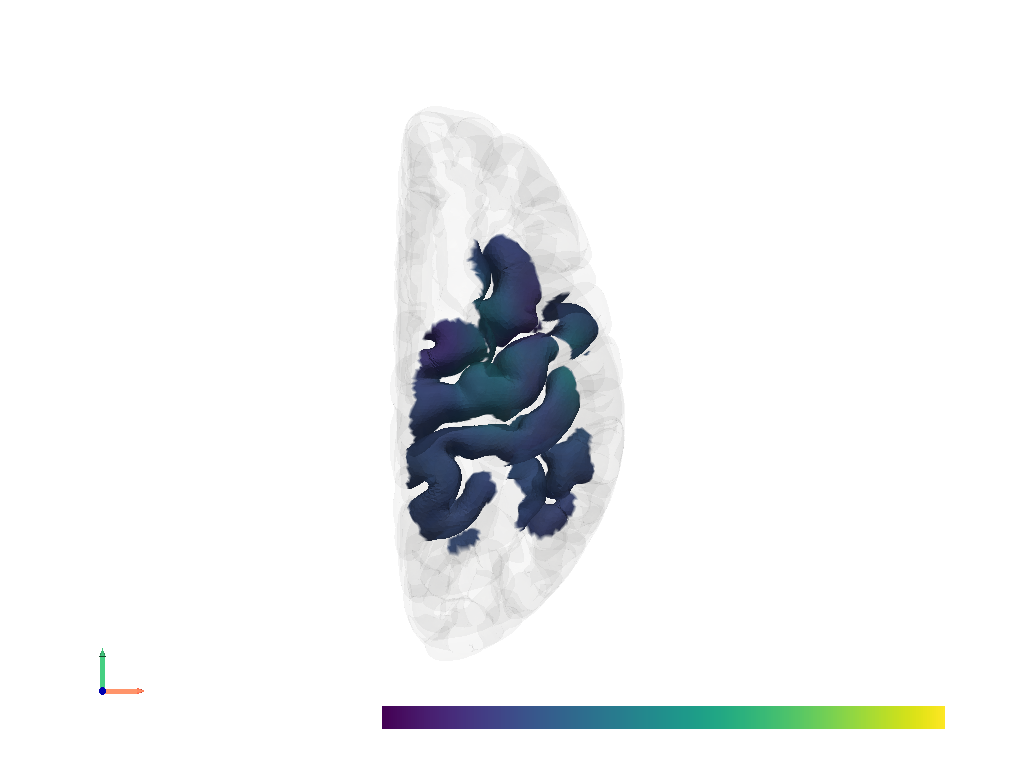


KeyboardInterrupt



In [3]:
feature  = "gamma_mean"
radius   = 10

for severity in list(ECOG_PSD.keys()):
    for segment in ["pre_event","event","post_event"]:
        ecog_activity_mesh = utils_plotting_cortex.map_ecog_activity_to_cortex_by_radius_v2(ECOG_dynamics.copy(),
                                                                                            cortex_mesh["right_hemisphere"].copy(),
                                                                                            feature=segment+"_"+feature, 
                                                                                            severity=severity, 
                                                                                            radius=radius)
        utils_plotting_cortex.plot_ECoG_activity_distribution_v2(cortex_mesh["right_hemisphere"], 
                                                                 ecog_activity_mesh, 
                                                                 feature=segment+"_"+feature, 
                                                                 cmap="viridis", 
                                                                 clim=[-50, 150],
                                                                 file_path=DATA_IO.path_figure + "ECoG_Maps/" + severity + "/")